# How Many Players Outside of Nikola Jokić Have Been Drafted Outside of the First Round and Made the All-NBA Team? 
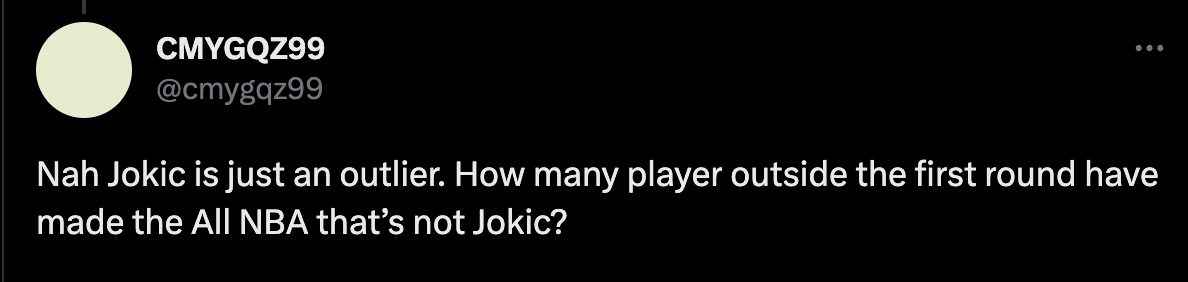
## <center> @cmygqz99 asked this on Twitter, so I thought I would take a stab at it <b><u> <br> <center> EDA done by @graceballdotnet on Twitter :)

<b> dfaccs data is from Ryan Schubert on Kaggle and contains all NBA player accolades from 1946-2022 <br>
    dfdraft data is from Matt Op on Kaggle and contains all drafted NBA players from 1989-2021

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

<b> loaded in NBA accolades data from Ryan Schubert on Kaggle 

In [2]:
dfaccs = pd.read_csv('nba_accolades.csv')

In [3]:
dfaccs.head()

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,...,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,...,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dfaccs['player'] = dfaccs['Player'].str.split('*').str[0]

<b> Had an interesting situation where some players in the accolades dataset had a star next to there name for a reason I could not find out. I went in and had to remove those to make sure that Ray Allen and Chris Bosh were not marked as undrafted players later in the project

In [5]:
dfaccs = dfaccs.drop('Player', axis = 1)

In [6]:
dfaccs = dfaccs[['player','From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G', 'PTS', 'TRB',
       'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS', 'All Star', 'All NBA',
       'All ABA', 'All Rookie', 'All Defensive', 'BLK Champ', 'STL Champ',
       'TRB Champ', 'AST Champ', 'Scoring Champ', 'Most Improved', 'Sixth Man',
       'DPOY', 'ROY', 'AS MVP', 'CF MVP', 'Finals MVP', 'MVP', 'Championships',
       'NBA 75 Team', 'ABA All-Time Team']]

In [7]:
dfaccs = dfaccs[dfaccs['From'] >=1990]

<b> changing to 1990 & 2021 for 2 reasons, the first is that our draft data set starts in 1989 becuase of the change from 3 rounds to 2 round of the NBA draft. Secondly, players drafted in 1989 were awarded in 1990.

In [8]:
dfaccs

,player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0,0,0,0,0,0,0,0,0,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0,0,0,0,0,0,0,0,0,0
5,Shareef Abdur-Rahim,1997,2008,12,F,6-9,6.750000,225.0,830,18.1,...,0,0,0,0,0,0,0,0,0,0
9,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,Derrick Zimmerman,2006,2006,1,G,6-3,6.250000,195.0,2,2.0,...,0,0,0,0,0,0,0,0,0,0
5016,Stephen Zimmerman,2017,2017,1,C,7-0,7.000000,240.0,19,1.2,...,0,0,0,0,0,0,0,0,0,0
5017,Paul Zipser,2017,2018,2,G-F,6-8,6.666667,215.0,98,4.7,...,0,0,0,0,0,0,0,0,0,0
5018,Ante Žižić,2018,2020,3,F-C,6-10,6.833333,266.0,113,6.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dfaccs.value_counts('To').sort_index()

To
1990     20
1991     17
1992     24
1993     30
1994     39
1995     32
1996     41
1997     48
1998     42
1999     54
2000     51
2001     57
2002     50
2003     59
2004     50
2005     86
2006     71
2007     68
2008     65
2009     66
2010     54
2011     55
2012     84
2013     70
2014     74
2015     78
2016     77
2017     83
2018    117
2019    109
2020     80
2021     90
2022    605
dtype: int64

<b> loaded in NBA draft data from Matt Op on Kaggle 

In [10]:
dfdraft = pd.read_csv('nbaplayersdraft.csv')

In [11]:
dfdraft.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


<b> accolades left merge on player name with draft to match the player with their respective draft pick

In [12]:
df = pd.merge(left = dfaccs, right = dfdraft, how = 'left' , on = 'player')

<b> checked to see if our df's combined correctly 

In [13]:
df.columns

Index(['player', 'From', 'To', 'Years', 'Pos', 'Ht', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All NBA', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team', 'id', 'year', 'rank', 'overall_pick', 'team',
       'college', 'years_active', 'games', 'minutes_played', 'points',
       'total_rebounds', 'assists', 'field_goal_percentage',
       '3_point_percentage', 'free_throw_percentage', 'average_minutes_played',
       'points_per_game', 'average_total_rebounds', 'average_assists',
       'win_shares', 'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement'],
      dtype='object')

In [14]:
df

,player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,...,0.000,0.701,12.5,5.7,3.3,0.3,4.8,0.072,-3.8,-1.5
1,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,...,0.354,0.905,26.7,14.6,1.9,3.5,25.2,0.077,-0.8,4.5
2,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,...,0.237,0.703,20.4,7.8,3.3,1.1,3.5,0.035,-3.0,-1.2
3,Shareef Abdur-Rahim,1997,2008,12,F,6-9,6.750000,225.0,830,18.1,...,0.297,0.810,34.8,18.1,7.5,2.5,71.2,0.118,1.0,21.9
4,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,...,0.368,0.880,16.0,5.3,1.4,0.5,5.0,0.086,-1.9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,Derrick Zimmerman,2006,2006,1,G,6-3,6.250000,195.0,2,2.0,...,NaN,NaN,16.0,2.0,2.0,3.5,0.0,0.004,-10.4,-0.1
2551,Stephen Zimmerman,2017,2017,1,C,7-0,7.000000,240.0,19,1.2,...,NaN,0.600,5.7,1.2,1.8,0.2,0.0,-0.005,-8.3,-0.2
2552,Paul Zipser,2017,2018,2,G-F,6-8,6.666667,215.0,98,4.7,...,0.335,0.769,17.0,4.7,2.6,0.8,0.0,-0.001,-5.2,-1.4
2553,Ante Žižić,2018,2020,3,F-C,6-10,6.833333,266.0,113,6.0,...,NaN,0.711,13.4,6.0,3.9,0.6,3.5,0.110,-2.6,-0.2


<b> filtered dataset to only second round players and All-NBA 

In [15]:
df1 = df[(df['overall_pick'] >= 31) & (df['All NBA'] >= 1)]

In [16]:
df1

,player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
84,Gilbert Arenas,2002,2012,11,G,6-4,6.333333,191.0,552,20.7,...,0.351,0.803,35.1,20.7,3.9,5.3,51.3,0.127,2.6,22.3
245,Carlos Boozer,2003,2015,13,F-C,6-9,6.750000,258.0,861,16.2,...,0.071,0.722,31.2,16.2,9.5,2.2,80.3,0.143,1.4,23.1
616,Goran Dragić,2009,2022,14,G,6-3,6.250000,190.0,888,13.7,...,0.362,0.767,27.9,13.7,3.1,4.8,56.3,0.109,0.6,16.3
794,Marc Gasol,2009,2021,13,C,6-11,6.916667,255.0,891,14.0,...,0.360,0.776,32.2,14.0,7.4,3.4,85.3,0.143,3.1,36.5
821,Manu Ginóbili,2003,2018,16,G,6-6,6.500000,205.0,1057,13.3,...,0.369,0.827,25.4,13.3,3.5,3.8,106.4,0.190,5.0,47.6
866,Draymond Green,2013,2022,10,F,6-6,6.500000,230.0,685,8.7,...,0.315,0.712,28.5,8.7,6.9,5.4,52.7,0.130,2.7,23.1
1204,Nikola Jokić,2016,2022,7,F-C,6-11,6.916667,284.0,527,19.7,...,0.345,0.830,30.4,19.7,10.4,6.2,79.6,0.239,8.9,44.0
1236,DeAndre Jordan,2009,2022,14,C,6-11,6.916667,265.0,980,9.1,...,0.083,0.475,26.7,9.1,10.3,1.0,94.4,0.173,1.3,21.9
1903,Michael Redd,2001,2012,12,G,6-6,6.500000,220.0,629,19.0,...,0.380,0.838,32.0,19.0,3.8,2.1,55.9,0.134,2.2,21.4
2240,Isaiah Thomas,2012,2022,11,G,5-9,5.750000,185.0,550,17.7,...,0.362,0.872,28.3,17.7,2.4,4.8,45.3,0.140,2.1,16.1


<b> rearranged columns

In [17]:
df1 = df1.rename(columns = {'team' : 'teamdraftedby'})

In [18]:
df1 = df1[['id','teamdraftedby','college','player','overall_pick', 'All NBA', 'From', 'To', 'Years', 'Pos', 'Height', 'Wt', 'G',
       'PTS', 'TRB', 'AST', 'FG%', 'FG3%', 'FT%', 'eFG%', 'PER', 'WS',
       'All Star', 'All ABA', 'All Rookie', 'All Defensive',
       'BLK Champ', 'STL Champ', 'TRB Champ', 'AST Champ', 'Scoring Champ',
       'Most Improved', 'Sixth Man', 'DPOY', 'ROY', 'AS MVP', 'CF MVP',
       'Finals MVP', 'MVP', 'Championships', 'NBA 75 Team',
       'ABA All-Time Team']]

In [19]:
df1

,id,teamdraftedby,college,player,overall_pick,All NBA,From,To,Years,Pos,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
84,701.0,GSW,Arizona,Gilbert Arenas,31.0,3,2002,2012,11,G,...,0,0,0,0,0,0,0,0,0,0
245,762.0,CLE,Duke,Carlos Boozer,35.0,1,2003,2015,13,F-C,...,0,0,0,0,0,0,0,0,0,0
616,1127.0,SAS,NaN,Goran Dragić,45.0,1,2009,2022,14,G,...,0,0,0,0,0,0,0,0,0,0
794,1070.0,LAL,NaN,Marc Gasol,48.0,2,2009,2021,13,C,...,0,1,0,0,0,0,0,1,0,0
821,612.0,SAS,NaN,Manu Ginóbili,57.0,2,2003,2018,16,G,...,1,0,0,0,0,0,0,4,0,0
866,1357.0,GSW,Michigan State,Draymond Green,35.0,2,2013,2022,10,F,...,0,1,0,0,0,0,0,4,0,0
1204,1483.0,DEN,NaN,Nikola Jokić,41.0,4,2016,2022,7,F-C,...,0,0,0,0,0,0,2,0,0,0
1236,1117.0,LAC,Texas A&M,DeAndre Jordan,35.0,3,2009,2022,14,C,...,0,0,0,0,0,0,0,0,0,0
1903,656.0,MIL,Ohio State,Michael Redd,43.0,1,2001,2012,12,G,...,0,0,0,0,0,0,0,0,0,0
2240,1322.0,SAC,Washington,Isaiah Thomas,60.0,1,2012,2022,11,G,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df1['id'] = df1['id'].astype(int)

In [21]:
df1['overall_pick'] = df1['overall_pick'].astype(int)

# The Final Set

In [22]:
df1

,id,teamdraftedby,college,player,overall_pick,All NBA,From,To,Years,Pos,...,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
84,701,GSW,Arizona,Gilbert Arenas,31,3,2002,2012,11,G,...,0,0,0,0,0,0,0,0,0,0
245,762,CLE,Duke,Carlos Boozer,35,1,2003,2015,13,F-C,...,0,0,0,0,0,0,0,0,0,0
616,1127,SAS,NaN,Goran Dragić,45,1,2009,2022,14,G,...,0,0,0,0,0,0,0,0,0,0
794,1070,LAL,NaN,Marc Gasol,48,2,2009,2021,13,C,...,0,1,0,0,0,0,0,1,0,0
821,612,SAS,NaN,Manu Ginóbili,57,2,2003,2018,16,G,...,1,0,0,0,0,0,0,4,0,0
866,1357,GSW,Michigan State,Draymond Green,35,2,2013,2022,10,F,...,0,1,0,0,0,0,0,4,0,0
1204,1483,DEN,NaN,Nikola Jokić,41,4,2016,2022,7,F-C,...,0,0,0,0,0,0,2,0,0,0
1236,1117,LAC,Texas A&M,DeAndre Jordan,35,3,2009,2022,14,C,...,0,0,0,0,0,0,0,0,0,0
1903,656,MIL,Ohio State,Michael Redd,43,1,2001,2012,12,G,...,0,0,0,0,0,0,0,0,0,0
2240,1322,SAC,Washington,Isaiah Thomas,60,1,2012,2022,11,G,...,0,0,0,0,0,0,0,0,0,0


### <u> Aside from Nikola Jokić, 9 other players have made All-NBA as a second round pick including Isaiah Thomas, Draymond Green and Marc Gasol 

# Further Investigating... 

<b> I was interested to know what the percentage of players drafted (or undrafted) in each round have made the All NBA team from 1989-2022 <br> <br> *The NBA draft dataset goes up until 2021 and the accoldaes dataset goes up to 2022. Due to the fact that if a player was drafted in 2021 they would have been awarded in 2022, I did not shorten the accolades dataset. 

In [23]:
def roundpicked(overall_pick):
    if overall_pick <= 30: 
        return 'first round '
    elif overall_pick >= 31: 
        return 'second round'
    else: 
        return 'undrafted / other'

In [24]:
df['roundpicked']=df['overall_pick'].apply(roundpicked)

In [25]:
df.value_counts('roundpicked')

roundpicked
first round          980
undrafted / other    874
second round         701
dtype: int64

In [26]:
dfANBA = df[df['All NBA'] >= 1]

In [27]:
dfANBA[dfANBA['roundpicked'] == 'undrafted / other']

,player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,...,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,roundpicked
1461,Anthony Mason,1990,2003,14,F,6-7,6.583333,250.0,882,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undrafted / other
1813,Dražen Petrović,1990,1993,4,G,6-5,6.416667,195.0,290,15.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undrafted / other
1949,David Robinson,1990,2003,14,C,7-1,7.083333,235.0,987,21.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undrafted / other
2359,Ben Wallace,1997,2012,16,F-C,6-9,6.750000,240.0,1088,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undrafted / other


<b> lets briefly talk about this group of undrafted / other players. The only undrafted player of this bunch is Ben Wallace. Anthony Mason was drafted in 1988 but did not play in the NBA until 1991. Dražen Patrović was not drafted but rather bought out from Real Madrid (basketball) by the Portland Trailblazers in 1989. David Robinson went #1 overall in 1987, but had to serve his time in the Navy for 2 years before returning to the NBA. 

In [28]:
ANBArnd = dfANBA.value_counts('roundpicked')

<b> Totals of the players in each round  or undrafted that were selected to All NBA

In [29]:
ANBArnd

roundpicked
first round          95
second round         10
undrafted / other     4
dtype: int64

In [30]:
ANBArnd.sum()

109

<b> Making the Pie Chart 

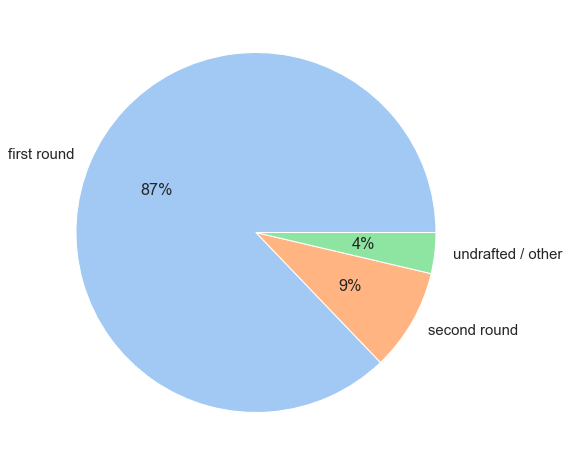

In [31]:
fig= plt.figure(figsize = (6,8), dpi = 75)
ax = fig.add_axes([0,0,1,1])
colors = sns.color_palette('pastel')
sns.set(font_scale=1.3)
labels = ['first round', 'second round', 'undrafted / other']
plt.pie(data = ANBArnd, x = ANBArnd, autopct='%.0f%%', colors= colors, labels = labels);

<b> So yes @cmygqz99 is right in that Jokić's career performance is rare and only 9 other players have done it before. And only 9% of all players who have been apart of the All NBA team between 1989-2022 are/were second round picks. 
## In conclusion, we are witnessing very rare greatness from Jokic, so make sure to watch the finals again tomorrow!